# FIFA World Cup Goalscorers 1930-2018

## List of all FIFA World Cup goalscoreres 1930-2018

### Lista de todos dos marcadores de gols da Copa do Mundo FIFA 1930-2018

Conjunto de dados que contém os jogadores que marcaram ao menos um gol na Copa do Mundo da FIFA. O dataset contém nome, quantidade de gols, anos de copas jogados e seu respectivo país

In [1]:
# Importando pacotes 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_palette('winter_r')

In [2]:
# Lendo o arquivo
df = pd.read_csv('worldcupgoals.csv')

In [3]:
# Hora de observar as 10 primeiras linhas 
df.head(10)

,Player,Goals,Years,Country
0,Miroslav Klose,16,2002-2006-2010-2014,Germany
1,Ronaldo,15,1998-2002-2006,Brazil
2,Gerd Muller,14,1970-1974,Germany
3,Just Fontaine,13,1958,France
4,Pele,12,1958-1962-1966-1970,Brazil
5,Jurgen Klinsmann,11,1990-1994-1998,Germany
6,Sandor Kocsis,11,1954,Hungary
7,Gabriel Batistuta,10,1994-1998-2002,Argentina
8,Gary Lineker,10,1986-1990,England
9,Thomas Muller,10,2010-2014,Germany


In [4]:
# Quantidade de jogadores diferentes marcando ao menos um gol por seus respectivos países 
Qtd_Countries = df.Country.value_counts().head(10)
Qtd_Countries = pd.DataFrame(Qtd_Countries)
Qtd_Countries = Qtd_Countries.reset_index()
Qtd_Countries

,index,Country
0,Brazil,81
1,Germany,78
2,Italy,60
3,Argentina,59
4,France,58
5,Spain,48
6,England,46
7,Mexico,42
8,Uruguay,39
9,Sweden,39


In [5]:
Qtd_Countries.rename(columns={'index': 'País', 'Country': 'Quantidade'}, inplace= True)
Qtd_Countries

,País,Quantidade
0,Brazil,81
1,Germany,78
2,Italy,60
3,Argentina,59
4,France,58
5,Spain,48
6,England,46
7,Mexico,42
8,Uruguay,39
9,Sweden,39


<BarContainer object of 10 artists>

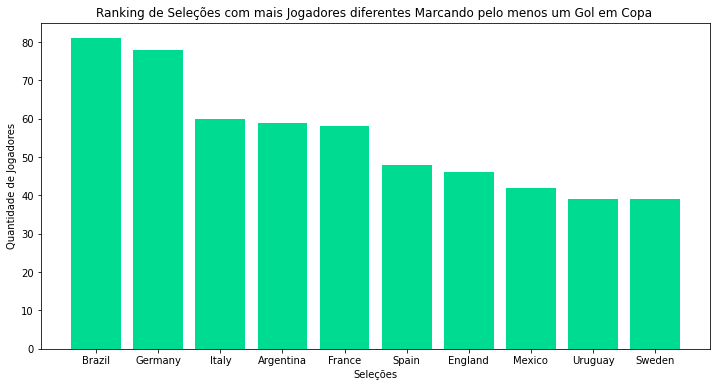

In [6]:
# Vamos transformar a célula acima em um gráfico 
plt.figure(figsize=(12,6))
plt.title('Ranking de Seleções com mais Jogadores diferentes Marcando pelo menos um Gol em Copa ')
plt.xlabel('Seleções')
plt.ylabel('Quantidade de Jogadores')
plt.bar(x = 'País', height= 'Quantidade', data= Qtd_Countries)

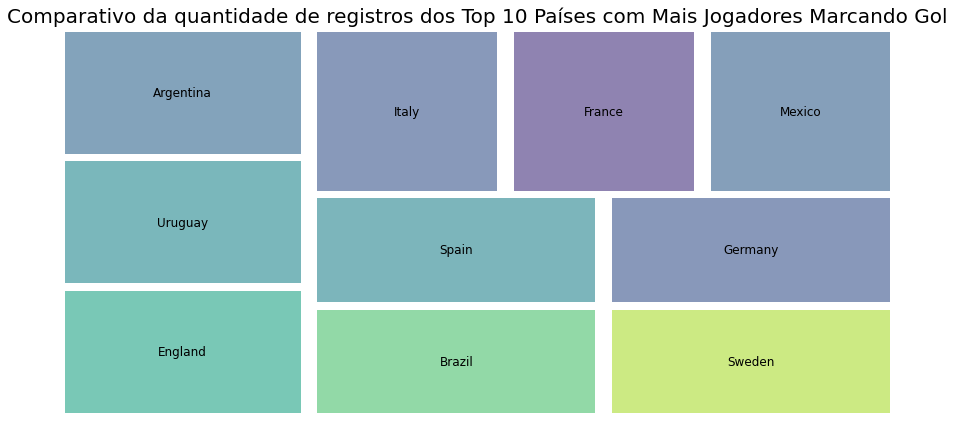

In [7]:
# Definindo o tamanho da figura
plt.figure(figsize=(12,6))

# Fazendo o Treemap
squarify.plot(sizes=Qtd_Countries['País'].value_counts(), label=Qtd_Countries['País'].value_counts().index,
              pad=True, alpha=0.6, text_kwargs={'fontsize': 12});

# Adicionando um título
plt.title('Comparativo da quantidade de registros dos Top 10 Países com Mais Jogadores Marcando Gol', fontsize=20)

# Removendo os eixos
plt.axis('off');

# Ajustando o gráfico
plt.tight_layout()

Esse gráfico mostra que por mais que o Brasil seja conhecido por ter os atletas mais diferenciados da história, não importando a posição, a Alemanha segue na cola por ter a constância de sempre formar times bons e equilibrados, diferente de Itália que é mais famosa por seu sistema defensivo excepcional e Argentina que sempre teve um ataque muito forte

In [8]:
# Agora vamos observar os Top 5 maiores artilheiros da Copa 
top5 = df.nlargest(5, 'Goals')[['Player','Goals']]
top5

,Player,Goals
0,Miroslav Klose,16
1,Ronaldo,15
2,Gerd Muller,14
3,Just Fontaine,13
4,Pele,12


In [9]:
# Agora vamos expandir um pouco e observar os Top 10 maiores artilheiros da Copa 
top10 = df.nlargest(10, 'Goals')[['Player','Goals']]
top10

,Player,Goals
0,Miroslav Klose,16
1,Ronaldo,15
2,Gerd Muller,14
3,Just Fontaine,13
4,Pele,12
5,Jurgen Klinsmann,11
6,Sandor Kocsis,11
7,Gabriel Batistuta,10
8,Gary Lineker,10
9,Thomas Muller,10


In [10]:
# Agora, agrupando por país, vamos ver o top 10 países com mais gols 
Country_goals = df.groupby(['Country']).sum().sort_values(by= 'Goals', ascending = False)
Country_goals.head(10)

,Goals
Country,
Brazil,228
Germany,226
Argentina,135
Italy,123
France,115
Spain,97
England,89
Uruguay,86
Hungary,86


In [11]:
# Verificando o tipo do objeto
type(Country_goals)

pandas.core.frame.DataFrame

In [12]:
# Filtrando os 10 países com mais gols em copas 
Top10_Country_Goals = Country_goals.reset_index().head(10)
Top10_Country_Goals

,Country,Goals
0,Brazil,228
1,Germany,226
2,Argentina,135
3,Italy,123
4,France,115
5,Spain,97
6,England,89
7,Uruguay,86
8,Hungary,86
9,Netherlands,84


<BarContainer object of 10 artists>

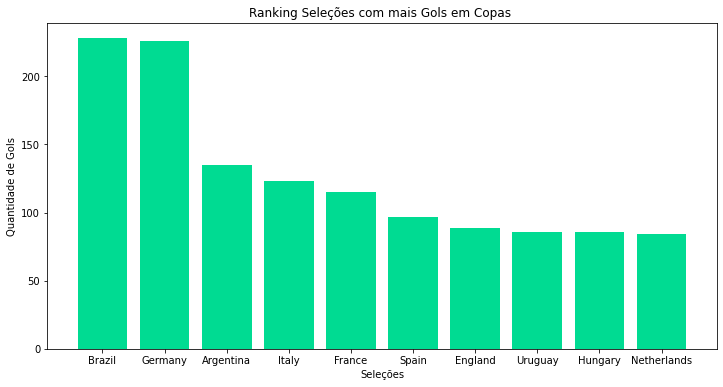

In [13]:
plt.figure(figsize=(12,6))
plt.title('Ranking Seleções com mais Gols em Copas ')
plt.xlabel('Seleções')
plt.ylabel('Quantidade de Gols')
plt.bar(x = 'Country', height = 'Goals', data= Top10_Country_Goals)

Como era de ser esperar, a única seleção que participou de todas as copas é quem lidera o ranking, mas seguida de perto pela Alemanha, isso significa que os alemães tem maior constância em avançar da fase de grupos de marcar gols 

É notado que o número de copas jogados é importante, então vamos criar uma variável para ver quantas copas cada jogador jogou

In [14]:
# Função para verificar a quantidade de copas que cada jogador jogou
def Played_Cups(qtd):
    return len(qtd.split(sep = "-"))

In [15]:
# Criando uma nova coluna e aplicando a função criada acima 
df["Played_Cups"] = df['Years'].apply(Played_Cups)

In [16]:
# Verificando o dataset
df

,Player,Goals,Years,Country,Played_Cups
0,Miroslav Klose,16,2002-2006-2010-2014,Germany,4
1,Ronaldo,15,1998-2002-2006,Brazil,3
2,Gerd Muller,14,1970-1974,Germany,2
3,Just Fontaine,13,1958,France,1
4,Pele,12,1958-1962-1966-1970,Brazil,4
...,...,...,...,...,...
1290,Josip Skoblar,1,1962,Yugoslavia,1
1291,Safet Susic,1,1982-1990,Yugoslavia,2
1292,Aleksandar Tirnanic,1,1930,Yugoslavia,1
1293,Djordje Vujadinovic,1,1930,Yugoslavia,1


Text(0, 0.5, 'Quantidade de Jogadores')

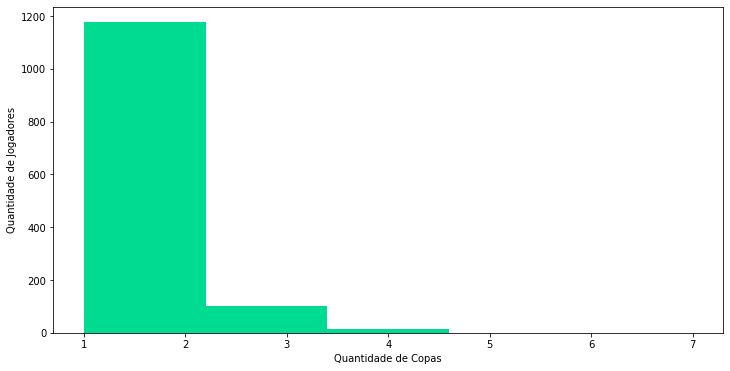

In [17]:
plt.figure(figsize=(12,6))
plt.hist(x = df.Played_Cups, bins=5, range= (1,7))
plt.xlabel("Quantidade de Copas")
plt.ylabel("Quantidade de Jogadores")

Copa do mundo é um evento que ocorre há cada 4 anos, e por ter um intervalo de evento que pode ser considerado longo, faz sentido que a maioria dos jogadores tenham jogado apenas uma copa, pois há vários fatores internos e externos para tal ocorrência como lesões, idade, opção técnica etc.

Agora vamos observar a média de gols por copas jogadas de cada jogador 


In [18]:
df["Mean_Goals_per_Cup"] = df.Goals / df.Played_Cups
df

,Player,Goals,Years,Country,Played_Cups,Mean_Goals_per_Cup
0,Miroslav Klose,16,2002-2006-2010-2014,Germany,4,4.0
1,Ronaldo,15,1998-2002-2006,Brazil,3,5.0
2,Gerd Muller,14,1970-1974,Germany,2,7.0
3,Just Fontaine,13,1958,France,1,13.0
4,Pele,12,1958-1962-1966-1970,Brazil,4,3.0
...,...,...,...,...,...,...
1290,Josip Skoblar,1,1962,Yugoslavia,1,1.0
1291,Safet Susic,1,1982-1990,Yugoslavia,2,0.5
1292,Aleksandar Tirnanic,1,1930,Yugoslavia,1,1.0
1293,Djordje Vujadinovic,1,1930,Yugoslavia,1,1.0


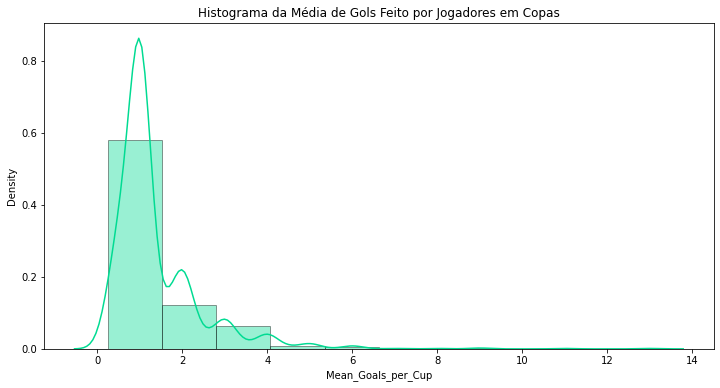

In [19]:
plt.figure(figsize=(12,6))
plt.title('Histograma da Média de Gols Feito por Jogadores em Copas')
sns.distplot(a=df.Mean_Goals_per_Cup, bins=10,
             hist_kws={"edgecolor": 'black'})
 
plt.show()

Novamente, Copa é um evento da mais alta qualidade onde a média de 1 até 4 gols pode ser considerada normal, mas como em todos os esportes, temos aqueles jogadores que se sobressaem, com média de 6 pra cima. Há até caso de média superior à 10

In [20]:
# E abaixo temos o Top 10 Melhores Médias de Gols por Copas jogadas,
# Claramento é fácil compreender a média absurda quando vemos a quantidade de copas jogadas
# 9 dos 10 jogadores jogaram apenas uma copa, então vamos filtrar para duas copas ou mais
top10_best_mean_goals = df.nlargest(10, 'Mean_Goals_per_Cup')[['Player','Goals','Played_Cups' ,'Mean_Goals_per_Cup']]
top10_best_mean_goals

,Player,Goals,Played_Cups,Mean_Goals_per_Cup
3,Just Fontaine,13,1,13.0
6,Sandor Kocsis,11,1,11.0
13,Ademir,9,1,9.0
21,Eusebio,9,1,9.0
24,Guillermo Stabile,8,1,8.0
2,Gerd Muller,14,2,7.0
39,Erich Probst,6,1,6.0
44,James Rodriguez,6,1,6.0
46,Harry Kane,6,1,6.0
50,Max Morlock,6,1,6.0


In [21]:
# Filtrando melhores médias por duas copas ou mais jogadas
top10_best_mean = df.loc[df.Played_Cups > 1].nlargest(10, 'Mean_Goals_per_Cup')[['Player','Country','Played_Cups' ,'Mean_Goals_per_Cup']]
top10_best_mean

,Player,Country,Played_Cups,Mean_Goals_per_Cup
2,Gerd Muller,Germany,2,7.0
1,Ronaldo,Brazil,3,5.0
8,Gary Lineker,England,2,5.0
9,Thomas Muller,Germany,2,5.0
10,Helmut Rahn,Germany,2,5.0
15,Vava,Brazil,2,4.5
19,Paolo Rossi,Italy,2,4.5
20,Christian Vieri,Italy,2,4.5
0,Miroslav Klose,Germany,4,4.0
25,Leonidas,Brazil,2,4.0


Agora sim, as melhores médias de gols somente com jogadores que jogaram mais de uma copa. 
Podemos observar que as principais seleções do mundo, sempre tiveram o privilégio de ter jogadores muito diferenciados no time para marcar muitos gols 

# Conclusão:
O que podemos concluir é desde a criação da Copa do Mundo, há países que sempre estão escrevendo mais histórias no torneio como Brasil, Alemanha e Itália que são as seleções que mais ganharam copas, além da companhia de Holanda, Argentina, Inglaterra, Uruguai e mais outras seleções tão importante quanto a tríade citada anteriormente, mas que não são tão vencedoras neste torneio